# Введение в нейронные сети

## Урок 1. Основы обучения нейронных сетей

### Практическое задание

Попробуйте видоизменить параметры разобранной на уроке нейронной сети таким образом, чтобы улучшить её точность. Проведите анализ:

    ➜ Что приводит к ухудшению точности нейронной сети?
    ➜ Что приводит к увеличению её точности?

### Решение

На качество прогноза нейронной сети могут влиять следующие параметры:
- количество слоёв;
- количество нейронов во внутренних слоях;
- функция активации;
- функция ошибки;
- метод оптимизации;
- количество эпох;
- количество и размер батчей.

В рамках данной реализации возможно:
- увеличить или уменьшить количество нейронов;
- увеличить количество слоёв;
- увеличить или уменьшить количество эпох и скорректировать скорость обучения.

Реализуем все доступные методы и сравним с базовой моделью с урока.

#### Бейзлайн - нейросеть с урока

In [1]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, multilabel_confusion_matrix

In [2]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [3]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")

# репрезентация данных в виде графиков
# g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.to_numpy())

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.to_numpy()
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
   

In [4]:
### Шаг 3. Обученние нейронной сети
# присваивание случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.01

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(10000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(np.dot(layer1, w1))
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(np.dot(layer0, w0))
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

Точность нейронной сети 94.14%


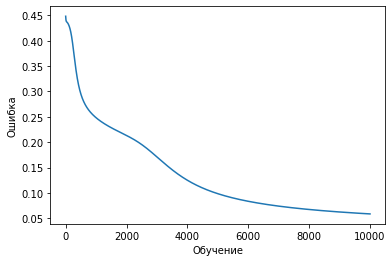

In [5]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

In [6]:
layer1 = sigmoid(np.dot(X_test, w0))
pred = sigmoid(np.dot(layer1, w1))

print(classification_report(y_test.argmax(-1), pred.argmax(-1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [7]:
df_metrics = pd.DataFrame()

df_metrics.loc['BaseLine', 'Accuracy_train'] = 0.94
df_metrics.loc['BaseLine', 'Accuracy_test'] = 0.96

df_metrics

,Accuracy_train,Accuracy_test
BaseLine,0.94,0.96


#### Увеличение количества нейронов

In [8]:
### Шаг 3. Обученние нейронной сети
# # присваивание случайных весов
# w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
# w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# ====================================================================================================
# ИЗМЕНЕНИЯ: количество нейронов было увеличено с 5 до 10
# ====================================================================================================

# присваивание случайных весов
w0 = 2*np.random.random((4, 10)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((10, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.01

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(10000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(np.dot(layer1, w1))
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(np.dot(layer0, w0))
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

Точность нейронной сети 94.4%


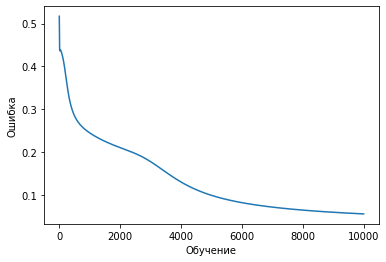

In [9]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

In [10]:
layer1 = sigmoid(np.dot(X_test, w0))
pred = sigmoid(np.dot(layer1, w1))

print(classification_report(y_test.argmax(-1), pred.argmax(-1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [11]:
df_metrics.loc['Neurons+', 'Accuracy_train'] = 0.95
df_metrics.loc['Neurons+', 'Accuracy_test'] = 0.96

df_metrics

,Accuracy_train,Accuracy_test
BaseLine,0.94,0.96
Neurons+,0.95,0.96


#### Уменьшение количества нейронов

In [12]:
### Шаг 3. Обученние нейронной сети
# # присваивание случайных весов
# w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
# w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# ====================================================================================================
# ИЗМЕНЕНИЯ: количество нейронов было уменьшино с 5 до 2
# ====================================================================================================

# присваивание случайных весов
w0 = 2*np.random.random((4, 2)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((2, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.01

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(10000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(np.dot(layer1, w1))
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(np.dot(layer0, w0))
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

Точность нейронной сети 81.07%


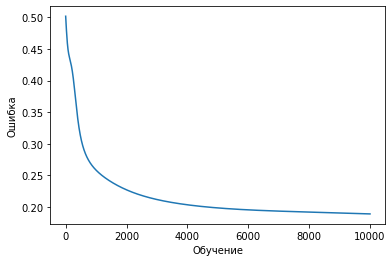

In [13]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

In [14]:
layer1 = sigmoid(np.dot(X_test, w0))
pred = sigmoid(np.dot(layer1, w1))

print(classification_report(y_test.argmax(-1), pred.argmax(-1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        16
           2       1.00      0.93      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [15]:
df_metrics.loc['Neurons-', 'Accuracy_train'] = 0.81
df_metrics.loc['Neurons-', 'Accuracy_test'] = 0.98

df_metrics

,Accuracy_train,Accuracy_test
BaseLine,0.94,0.96
Neurons+,0.95,0.96
Neurons-,0.81,0.98


#### Добавление нового слоя

In [16]:
### Шаг 3. Обученние нейронной сети
# присваивание случайных весов

# ====================================================================================================
# ИЗМЕНЕНИЯ: количество слоёв было увеличено с 2 до 3
# ====================================================================================================
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 5)) - 1
w2 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.01

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(10000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer3 = sigmoid(np.dot(layer2, w2))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer3_error = y_train - layer3
    layer3_delta = layer3_error * sigmoid_deriv(np.dot(layer2, w2))
    
    layer2_error = layer3_delta.dot(w2.T)
    layer2_delta = layer2_error * sigmoid_deriv(np.dot(layer1, w1))
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(np.dot(layer0, w0))
    
    w2 += layer2.T.dot(layer3_delta) * n
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer3_error))
    errors.append(error)
    accuracy = (1 - error) * 100

Точность нейронной сети 96.02%


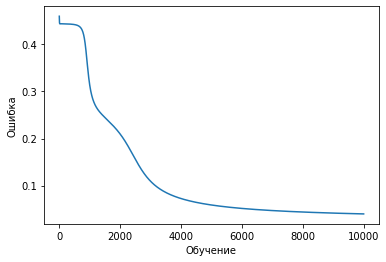

In [17]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

In [18]:
# ====================================================================================================
# ИЗМЕНЕНИЯ: количество слоёв было увеличено с 2 до 3
# ====================================================================================================

layer1 = sigmoid(np.dot(X_test, w0))
layer2 = sigmoid(np.dot(layer1, w1))
pred = sigmoid(np.dot(layer2, w2))

print(classification_report(y_test.argmax(-1), pred.argmax(-1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [19]:
df_metrics.loc['Layer+', 'Accuracy_train'] = 0.96
df_metrics.loc['Layer+', 'Accuracy_test'] = 0.96

df_metrics

,Accuracy_train,Accuracy_test
BaseLine,0.94,0.96
Neurons+,0.95,0.96
Neurons-,0.81,0.98
Layer+,0.96,0.96


#### Увеличение количества эпох

In [20]:
### Шаг 3. Обученние нейронной сети
# присваивание случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# ====================================================================================================
# ИЗМЕНЕНИЯ: скорость обучения была уменьшина с 0.01 до 0.001
# ====================================================================================================

# скорость обучения (learning rate)
# n = 0.01
n = 0.001

# массив для ошибок, чтобы потом построить график
errors = []

# ====================================================================================================
# ИЗМЕНЕНИЯ: количество эпох было увеличено с 10000 до 100000
# ====================================================================================================

# процесс обучения
# for i in range(10000):
for i in range(100000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(np.dot(layer1, w1))
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(np.dot(layer0, w0))
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

Точность нейронной сети 94.25%


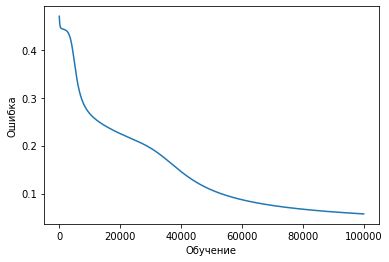

In [21]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

In [22]:
layer1 = sigmoid(np.dot(X_test, w0))
pred = sigmoid(np.dot(layer1, w1))

print(classification_report(y_test.argmax(-1), pred.argmax(-1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [23]:
df_metrics.loc['Epoch+', 'Accuracy_train'] = 0.94
df_metrics.loc['Epoch+', 'Accuracy_test'] = 0.96

df_metrics

,Accuracy_train,Accuracy_test
BaseLine,0.94,0.96
Neurons+,0.95,0.96
Neurons-,0.81,0.98
Layer+,0.96,0.96
Epoch+,0.94,0.96


#### Уменьшение количества эпох

In [24]:
### Шаг 3. Обученние нейронной сети
# присваивание случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# ====================================================================================================
# ИЗМЕНЕНИЯ: скорость обучения была увеличена с 0.01 до 0.5
# ====================================================================================================

# скорость обучения (learning rate)
# n = 0.01
n = 0.5

# массив для ошибок, чтобы потом построить график
errors = []

# ====================================================================================================
# ИЗМЕНЕНИЯ: количество эпох было уменьшино с 10000 до 5000
# ====================================================================================================

# процесс обучения
# for i in range(10000):
for i in range(5000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(np.dot(layer1, w1))
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(np.dot(layer0, w0))
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

Точность нейронной сети 97.36%


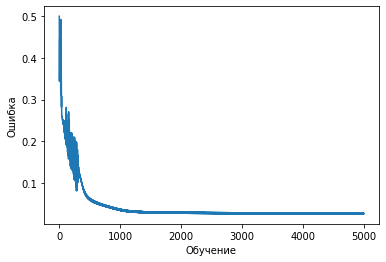

In [25]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

In [26]:
layer1 = sigmoid(np.dot(X_test, w0))
pred = sigmoid(np.dot(layer1, w1))

print(classification_report(y_test.argmax(-1), pred.argmax(-1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.88      0.90        16
           2       0.88      0.93      0.90        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



In [27]:
df_metrics.loc['Epoch-', 'Accuracy_train'] = 0.97
df_metrics.loc['Epoch-', 'Accuracy_test'] = 0.96

df_metrics

,Accuracy_train,Accuracy_test
BaseLine,0.94,0.96
Neurons+,0.95,0.96
Neurons-,0.81,0.98
Layer+,0.96,0.96
Epoch+,0.94,0.96
Epoch-,0.97,0.96


#### Выводы

In [28]:
df_metrics

,Accuracy_train,Accuracy_test
BaseLine,0.94,0.96
Neurons+,0.95,0.96
Neurons-,0.81,0.98
Layer+,0.96,0.96
Epoch+,0.94,0.96
Epoch-,0.97,0.96


Как показывают полученные метрики, количество нейронов, слоёв и эпох влияют на качество нейросети:
- при увеличении количества нейронов точность прогноза обучающей выборке улучшилась, на тестовой выборке значительных изменений не произошло;
- при сокращении числа нейронов качество прогноза на обучающей выборке ухудшилось, но при этом наблюдается улучшение метрики на тестовой выборке. Данный феномен может быть объяснён удачными данными их разбиением. В целом, при сокращении количества нейронов способность сети улавливать сложные зависимости пострадала. В данном случае, задача прогнозирования не является сложной, поэтому более простая сеть, с более поверхностным анализом данных, справилась лучше;
- увеличение количества слоёв в данном случае выровняло метрики на обучающей и тестовой выборках. Вероятно, модель смогла получить максимум информации из данных;
- увеличение и уменьшение количества эпох с корректировкой скорости обучения сказалось лишь на качестве прогноза на обучающей выборке. Алгоритм нашёл минимум функции потерь с разной скоростью. На графике, где было меньшее количество эпох, но выше скорость обучения, можно наблюдать, что минимизация ошибки была менее плавной.